In [ ]:
#@title Librerias
from sympy import legendre, symbols, diff, expand, factor, simplify
from scipy.special import legendre as legendre_scipy
import numpy as np
import matplotlib.pyplot as plt



# Polinomios de Legendre

Los **polinomios de Legendre** son una familia de polinomios ortogonales que surgen como soluciones de la **ecuación diferencial de Legendre**:

$$
(1 - x^2) \frac{d^2y}{dx^2} - 2x \frac{dy}{dx} + n(n+1)y = 0,
$$

donde $n$ es un número entero no negativo.


Los polinomios de Legendre, $P_n(x)$, se definen mediante la fórmula de Rodrigues:

$$
P_n(x) = \frac{1}{2^n n!} \frac{d^n}{dx^n} \left[(x^2 - 1)^n\right].
$$



## Primeros 5 polinomios de Legendre

1. $P_0(x) = 1$
2. $P_1(x) = x$
3. $P_2(x) = \frac{1}{2}(3x^2 - 1)$
4. $P_3(x) = \frac{1}{2}(5x^3 - 3x)$
5. $P_4(x) = \frac{1}{8}(35x^4 - 30x^2 + 3)$


In [ ]:
x = symbols('x')

for i in range(5):
    display(simplify(legendre(i, x)))

1

x

3*x**2/2 - 1/2

x*(5*x**2 - 3)/2

35*x**4/8 - 15*x**2/4 + 3/8

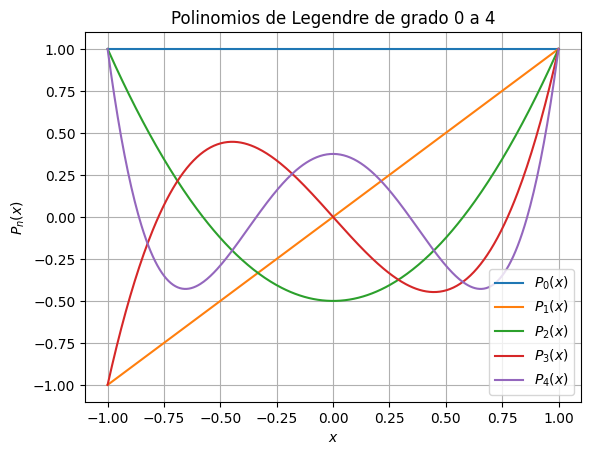

In [ ]:
def plot_legendre_polynomials(order):
    # Crear un arreglo de valores entre -1 y 1 para evaluar los polinomios
    x = np.linspace(-1, 1, 400)

    for n in range(order):
        # Obtener el polinomio de Legendre de grado n
        P_n = legendre_scipy(n)
        # Evaluar el polinomio en los puntos x
        y = P_n(x)
        # Graficar el polinomio
        plt.plot(x, y, label=f'$P_{n}(x)$')

    # Configurar el gráfico
    plt.xlabel('$x$')
    plt.ylabel('$P_n(x)$')
    plt.title(f'Polinomios de Legendre de grado 0 a {order-1}')
    plt.legend()
    plt.grid(True)
    plt.show()

# Llamar a la función para graficar los polinomios
plot_legendre_polynomials(5)


# Método de Cuadratura Gaussiana

El método de **cuadratura gaussiana** es una técnica para aproximar integrales definidas de la forma:

$$
\int_a^b f(x) \, dx,
$$

mediante una suma ponderada de valores de la función en ciertos puntos dentro del intervalo. Es especialmente útil para obtener una aproximación precisa con un número mínimo de evaluaciones de la función.

En la cuadratura gaussiana, se elige una familia de polinomios ortogonales (como los *polinomios de Legendre*) para determinar:

1. **Los puntos de evaluación**: Las raíces de los polinomios ortogonales.
2. **Los pesos de la cuadratura**: Coeficientes asociados a cada raíz.

La integral se aproxima como:

$$
\int_{-1}^1 f(x) \, dx \approx \sum_{i=1}^n w_i f(x_i),
$$

donde:
- $x_i$ son las **raíces** del polinomio de Legendre $P_n(x)$.
- $w_i$ son los **pesos** determinados de manera que la fórmula sea exacta para polinomios de grado $2n - 1$ o menor.

## Uso de los polinomios de Legendre

1. **Raíces de $P_n(x)$**:
   - Los puntos $x_i$ se eligen como las raíces del polinomio de Legendre $P_n(x)$. Estos puntos son simétricos respecto al origen ($x_i \in [-1, 1]$).
   
2. **Cálculo de los pesos**:
   Los pesos $w_i$ se calculan mediante la fórmula:
   $$
   w_i = \frac{2}{(1 - x_i^2) \left[P_n'(x_i)\right]^2},
   $$
   donde $P_n'(x)$ es la derivada del polinomio de Legendre $P_n(x)$.

3. **Extensión a intervalos generales**:
   Si la integral está definida en un intervalo arbitrario $[a, b]$, se realiza un cambio de variable:
   $$
   \int_a^b f(x) \, dx = \frac{b-a}{2} \int_{-1}^1 f\left(\frac{b-a}{2}x + \frac{a+b}{2}\right) \, dx.
   $$
   Luego, se aplica la cuadratura en el intervalo $[-1, 1]$.

  así la integral es aproximadamente igual a

  $$\int_a^b f(x)\,dx \approx \frac{b-a}{2} \sum_{i=1}^n w_i\,f\left(\frac{b-a}{2}x_i + \frac{a+b}{2}\right).$$

Si se usan $n$ puntos se puede demostrar que el error es proporcional a la $2n$-esima derivada ósea,

$$\epsilon=\frac{(b-a)^{2n+1} (n!)^4}{(2n+1)[(2n)!]^3} f^{(2n)} (\xi),$$

con $a < \xi < b$.






In [ ]:
from scipy.special import roots_legendre

# Elegir el grado del polinomio de Legendre (y el número de puntos para cuadratura)
n = 2  # Puedes cambiar el valor de n

# Obtener raíces y pesos
x_i, w_i = roots_legendre(n)

# Mostrar resultados
print("Raíces (puntos de Gauss) para n =", n)
print(x_i)
print("\nPesos para n =", n)
print(w_i)

Raíces (puntos de Gauss) para n = 2
[-0.57735027  0.57735027]

Pesos para n = 2
[1. 1.]


# Tabla de Raíces y Pesos de Polinomios de Legendre

| Grado $n$ | Raíces ($x_i$)                                     | Pesos ($w_i$)                              |
|-----------|----------------------------------------------------|--------------------------------------------|
| **1**     | $x_1 = 0$                                          | $w_1 = 2$                                  |
| **2**     | $x_1 = -\sqrt{\frac{1}{3}}, \, x_2 = \sqrt{\frac{1}{3}}$ | $w_1 = w_2 = 1$                            |
| **3**     | $x_1 = -\sqrt{\frac{3}{5}}, \, x_2 = 0, \, x_3 = \sqrt{\frac{3}{5}}$ | $w_1 = w_3 = \frac{5}{9}, \, w_2 = \frac{8}{9}$ |
| **4**     | $x_1 = -\sqrt{\frac{3}{7} + \frac{2\sqrt{6/5}}{7}},$ | $w_1 = w_4 = \frac{18 - \sqrt{30}}{36}$    |
|           | $x_2 = -\sqrt{\frac{3}{7} - \frac{2\sqrt{6/5}}{7}},$ | $w_2 = w_3 = \frac{18 + \sqrt{30}}{36}$    |
|           | $x_3 = \sqrt{\frac{3}{7} - \frac{2\sqrt{6/5}}{7}},$ |                                            |
|           | $x_4 = \sqrt{\frac{3}{7} + \frac{2\sqrt{6/5}}{7}}$  |                                            |
| **5**     | $x_1 = -\frac{1}{3}\sqrt{5 + 2\sqrt{\frac{10}{7}}},$ | $w_1 = w_5 = \frac{322 - 13\sqrt{70}}{900}$ |
|           | $x_2 = -\frac{1}{3}\sqrt{5 - 2\sqrt{\frac{10}{7}}},$ | $w_2 = w_4 = \frac{322 + 13\sqrt{70}}{900}$ |
|           | $x_3 = 0$                                          | $w_3 = \frac{128}{225}$                    |


1. Los valores para $x_i$ y $w_i$ se calculan con fórmulas exactas, pero en la práctica se suelen usar sus aproximaciones numéricas.
2. Para integrales definidas en $[-1, 1]$, estos valores se usan directamente.
3. Para integrales en un intervalo $[a, b]$, se realiza un cambio de variable para mapear el intervalo.



# Ejemplo: Cuadratura Gaussiana para una Integral

Queremos aproximar la integral:

$$
\int_{-1}^1 e^x \, dx.
$$

Usaremos **cuadratura gaussiana con $n = 2$** (dos puntos de evaluación).

## Paso 1: Raíces de $P_2(x)$
El polinomio de Legendre de grado 2 es:

$$
P_2(x) = \frac{1}{2}(3x^2 - 1).
$$

Sus raíces, que son los puntos de evaluación $x_1$ y $x_2$, son:

$$
x_1 = -\sqrt{\frac{1}{3}}, \quad x_2 = \sqrt{\frac{1}{3}}.
$$

## Paso 2: Pesos asociados
Para $n = 2$, los pesos son iguales:

$$
w_1 = w_2 = 1.
$$

## Paso 3: Aproximación de la integral
La fórmula de cuadratura gaussiana para $n = 2$ es:

$$
\int_{-1}^1 e^x \, dx \approx w_1 f(x_1) + w_2 f(x_2).
$$

Sustituyendo los valores de $w_1$, $w_2$, $x_1$, y $x_2$:

$$
\int_{-1}^1 e^x \, dx \approx 1 \cdot e^{- \sqrt{\frac{1}{3}}} + 1 \cdot e^{\sqrt{\frac{1}{3}}}.
$$

## Paso 4: Evaluación numérica
Calculamos los valores numéricos:

1. $\sqrt{\frac{1}{3}} \approx 0.57735$.
2. $e^{0.57735} \approx 1.781312$.
3. $e^{-0.57735} \approx 0.561383$.

Por lo tanto:

$$
\int_{-1}^1 e^x \, dx \approx 1.781312 + 0.561383 = 2.342695.
$$

## Resultado exacto
La integral exacta de $e^x$ en $[-1, 1]$ es:

$$
\int_{-1}^1 e^x \, dx = e^1 - e^{-1} \approx 2.350402.
$$




In [ ]:
#@title Cuadratura Gaussiana
def gauss_quad_standard(func, n):
    """
    Calcula la integral de una función en el intervalo [-1, 1]
    utilizando cuadratura gaussiana.

    Parameters:
    - func: La función a integrar.
    - n: Número de puntos para la cuadratura (grado del polinomio de Legendre).

    Returns:
    - Aproximación de la integral.
    """
    # Obtener raíces y pesos del polinomio de Legendre
    x, w = roots_legendre(n)

    # Evaluar la suma ponderada
    integral = np.sum(w * func(x))
    return integral

In [ ]:
f = lambda x: np.exp(x)

# Número de puntos (grado del polinomio de Legendre)
n = 2

# Calcular la integral en [-1, 1]
result = gauss_quad_standard(f, n)
print(f"La aproximación de la integral es: {result}")


La aproximación de la integral es: 2.3426960879097307


## Cuadratura Gaussiana en SciPy

En **SciPy**, existe un método llamado **`fixed_quad`** que realiza integración utilizando la **cuadratura gaussiana fija**. Este método es similar a la cuadratura gaussiana, ya que utiliza una cantidad fija de puntos de Gauss para aproximar la integral.

Este método implementa la **cuadratura gaussiana** con un número especificado de puntos de Gauss, es decir, no se adapta dinámicamente al comportamiento de la función a integrar. Requiere que se defina el número de puntos de Gauss para obtener la precisión deseada.



```python
scipy.integrate.fixed_quad(func, a, b, n=5, args=(), **kwargs)


In [ ]:
from scipy.integrate import fixed_quad

f = lambda x: np.exp(x)

# Número de puntos (grado del polinomio de Legendre)
n = 2

# Calcular la integral en [-1, 1]
result, _ = fixed_quad(f, -1, 1, n=n)
print(f"La aproximación de la integral es: {result}")

La aproximación de la integral es: 2.3426960879097307
